<h1 align="left">
<img src="roulette.jpg" alt="monaco" height="100" width="100" align="right"/>
</h1>

# Task and project estimation with monaco

This notebook showcases the monaco python package by applying it to a project estimation task.

## Introduction

Estimating the duration of projects and tasks is difficult. Often the time it takes to complete is dependent on variables that can not be controlled or foreseen, and a great deal of uncertainty must be factored into any estimates made. 

One way to do this is to model a Task as a stochastic process and simulate that process many times to establish the likelihood of completion within a certain amount of time.

For this tutorial we will assume a project where we build a machine learning model from scratch to deploying it in production. This project exists of the following sequential tasks:


![Building an ML model](tutorial/project_example.png)

In [1]:
from monaco import Task, Project
import seaborn as sns

# Task example 1

In [2]:
t1 = Task(name='Problem definition', min=1, max=5, estimator='uniform')

In [3]:
t1.estimate()

2.486387754844234

In [4]:
[t1.estimate() for i in range(10)]

[4.788402586883622,
 1.1970128807396323,
 2.142691548242047,
 3.005675416228931,
 4.987578666972285,
 2.1285207063695757,
 2.6352442792794695,
 2.3537445426393178,
 3.028184386641067,
 1.6543953642471556]

In [5]:
t1_estimates = [t1.estimate() for i in range(1000)]

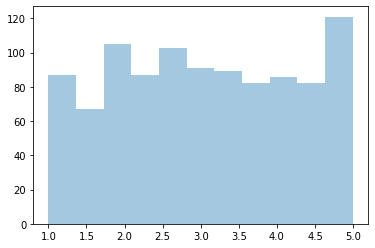

In [6]:
sns.distplot(t1_estimates, hist=True, kde=False)

# Task example 2

In [7]:
t2 = Task(name='Feature Engineering', min=3, mode=4, max=9, estimator='triangular')

In [8]:
t2.estimate()

4.370295943721028

In [9]:
[t2.estimate() for i in range(10)]

[4.686020039545579,
 4.11808054902572,
 3.7594454781996047,
 4.7002483980420235,
 3.753976581821113,
 4.1400776897323635,
 6.93447085296704,
 5.22957841330685,
 5.276459688877416,
 4.2937042724754555]

In [10]:
t2_estimates = [t2.estimate() for i in range(1000)]

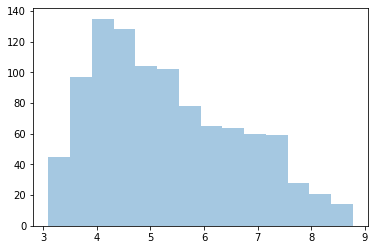

In [11]:
sns.distplot(t2_estimates, hist=True, kde=False)

# Project estimation

Now we'll model the project in sequence: 
- First we initiate a project
- Then we define the project tasks
- Finally we add the tasks to the project


To estimate a task we use the following notation:

![](tutorial/task_definition.png)


The full project is estimated as follows:

![](tutorial/project_estimation.png)


In [14]:
p = Project(name='Equilibribrium')

In [15]:
t1 = Task(name='Problem definition', min=1, max=5, estimator='uniform')
t2 = Task(name='EDA', min=1, mode=2, max=3, estimator='uniform')
t3 = Task(name='Feature Engineering', min=3, mode=4, max=9, estimator='triangular')
t4 = Task(name='Train', min=1, mode=2, max=4, estimator='triangular')
t5 = Task(name='Evaluate', min=1, mode=2, max=5, estimator='triangular')
t6 = Task(name='Deploy', min=3, mode=7, max=9, estimator='triangular')

In [16]:
p.add_task(t1)
p.add_task(t2)
p.add_task(t3)
p.add_task(t4)
p.add_task(t5)
p.add_task(t6)

# Estimated project duration

Running a monte carlo simulation means summing the result of n estimations of random variables. The Central Limit Theorem tells us that with large enough "n" the new distribution will approximate a normal distribution.

This allows us to estimate the probability of completing the project within a certain number of days.

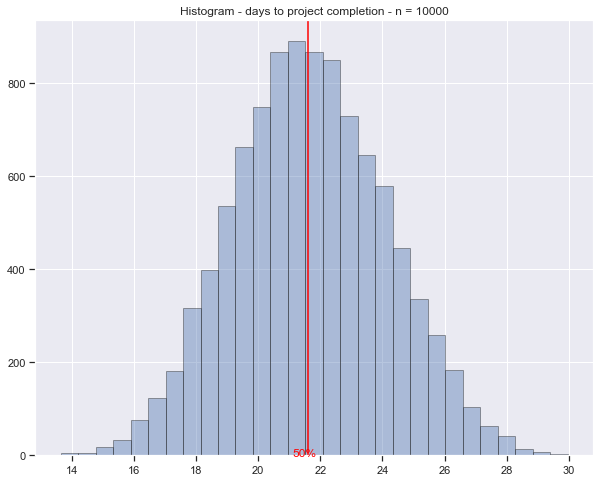

In [21]:
plot_data = p.plot(n=10000)

## Cumulative distribution function

The CDF allows us to easily read out the probability of completing the project under a certain number of days.

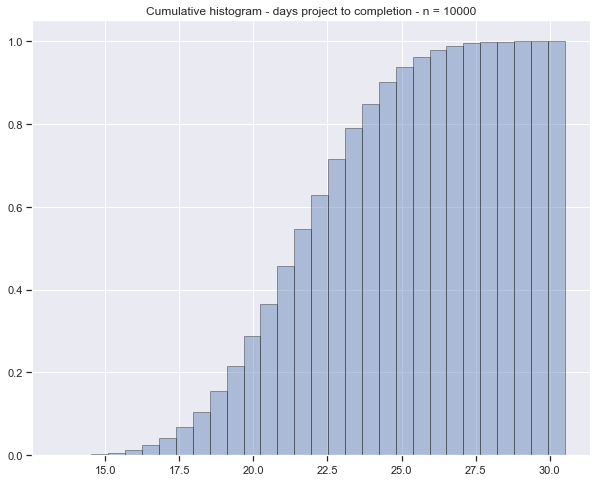

In [18]:
plot_data = p.plot(n=10000, hist=False)